In [1]:
# import libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# helper function to show images in matplotlib, since OpenCV loads in BGR, this invert the channels

def imgshow(img):
    plt.figure(figsize=(10,10))
    plt.imshow((img[:,:,::-1]))

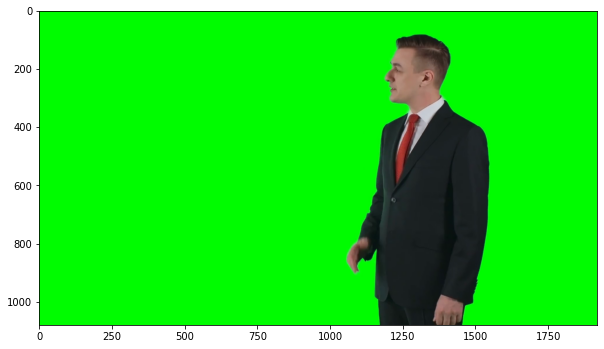

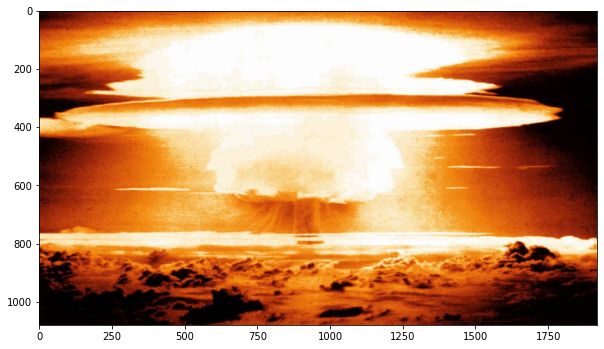

In [6]:
# load the green screen image and the background we want to apply

man_green_screen = cv2.imread('./img/green_screen_man.png')
background = cv2.imread('./img/explosion.jpg')

imgshow(man_green_screen)
imgshow(background)

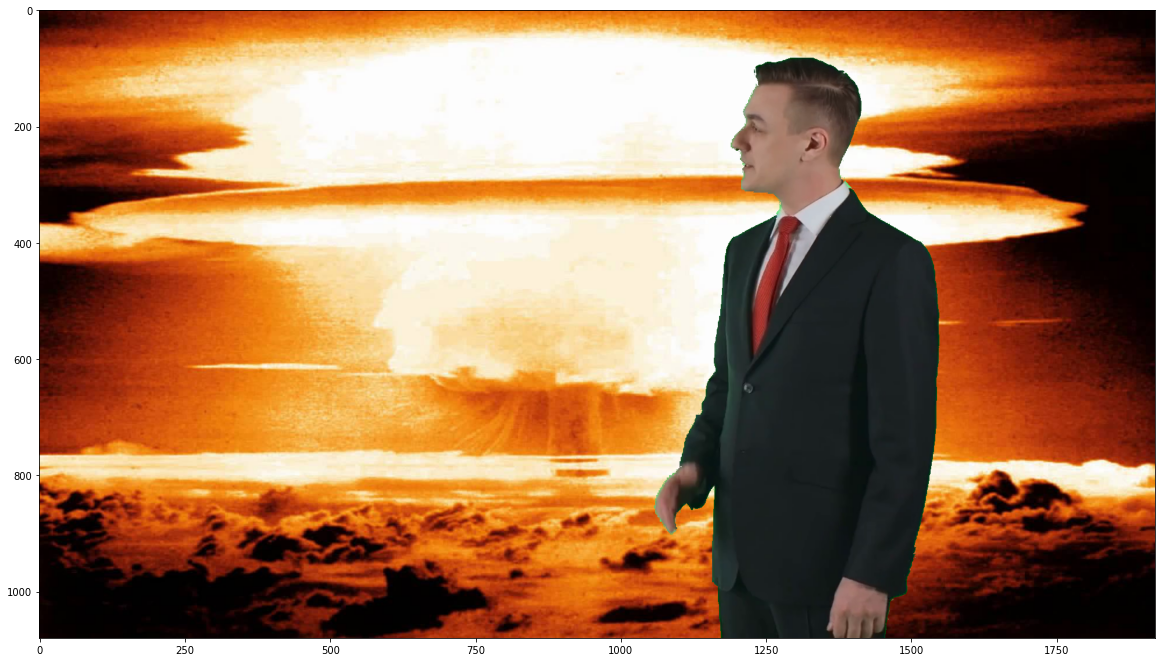

In [8]:
# create a copy of the image to work with
img = man_green_screen.copy()

#convert the image to HSV to define the mask
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# upper and lower bounday for the green screen
u_green = np.array([100, 255, 100]) 
l_green = np.array([0, 100, 0])

# creating the mask
mask = cv2.inRange(img, l_green, u_green)

# creating other copy of the images and the background with the original color
masked_img = img.copy()
masked_back = background.copy()

# apply the mask to both the image and the background (notice the != on the masked img)
masked_img[mask != 0] = [0,0,0]
masked_back[mask == 0] = [0,0,0]

# merge the two image together
merged = masked_img + masked_back

# color the merged image in RGB
merged = cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)

# show the image with matplotlib
plt.figure(figsize=(20,20))
plt.imshow(merged)